In [1]:
import pandas as pd  #data preprocessing
import numpy as np   #numerical python
import matplotlib.pyplot as plt   # for visualization

In [2]:
data={"Area(sqft)":[2600,3000,3200,3600,4000],
     "Price":[550000,565000,610000,680000,725000]}
df=pd.DataFrame(data)
df

,Area(sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
df.head(2)

,Area(sqft),Price
0,2600,550000
1,3000,565000


In [4]:
df.tail(3)

,Area(sqft),Price
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
df['Price']

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [6]:
type(df['Area(sqft)'])

pandas.core.series.Series

In [7]:
df[['Area(sqft)','Price']]

,Area(sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
type(df[['Area(sqft)','Price']])

pandas.core.frame.DataFrame

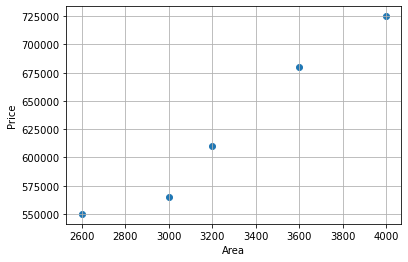

In [9]:
plt.scatter(df['Area(sqft)'],df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.show()


In [10]:
x=df[['Area(sqft)']]   #actual x
y=df['Price']          #actual y
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5, 1)
(5,)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model1=LinearRegression()
#model1.fit(x,y)

In [13]:
model1.fit(x,y) # trains the ML model on the training data 

LinearRegression()

In [14]:
print('R2 score',model1.score(x,y))  # if r2 >0.8 or 0.85 then the model is good other wise not

R2 score 0.9584301138199486


In [15]:
y_pred=model1.predict(x)   # predicted y value based on x to fit on linear line
y_pred

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [16]:
df['Pred_Price']=y_pred
df

,Area(sqft),Price,Pred_Price
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


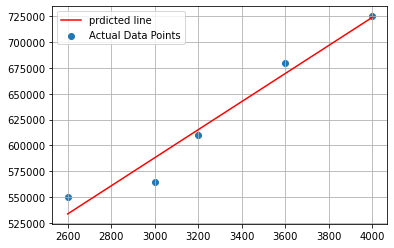

In [17]:
# visualizing good fit line 
plt.scatter(df['Area(sqft)'],df["Price"],label='Actual Data Points') 
#plt.legend()
plt.grid()
plt.plot(x,y_pred,label="prdicted line",color='red')
plt.legend()
#plt.plot()

In [18]:
#1 find price if area = 4400 sqft
#2 find price if area = 3450 sqft

# TEST DATA
ypred_4400=model1.predict([[4400]])
ypred_3450=model1.predict([[3450]])
print(ypred_4400)
print(ypred_3450)

[778082.19178082]
[649083.90410959]


# Multiple linear regression

In [19]:
import os
os.chdir('C:\\Users\\Anitha\\Desktop')
os.getcwd()

'C:\\Users\\Anitha\\Desktop'

In [20]:
df2=pd.read_csv("Real estate.csv")
df2

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
df2.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [22]:
#actual data points
x2=df2[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station',
'X4 number of convenience stores','X5 latitude','X6 longitude']]
y2=df2['Y house price of unit area']
type(x2)
type(y2)
print(x2.shape)
print(y2.shape)

(414, 6)
(414,)


In [23]:
model2=LinearRegression()
model2.fit(x2,y2)

LinearRegression()

In [24]:
print('R2 score',model2.score(x2,y2))

R2 score 0.582370447272306


In [25]:
y_pred=model2.predict(x2)   #predicted values of real estate price for given x1,x2....x6
                            #y_pred=X1 transaction date*m[0]+X2 house age*m[1]+............+c

In [26]:
df2['pred_price']=y_pred
#print(df2.head())
#print(df2.shape)

In [27]:
# now test the new data 
y_test=model2.predict([['2013.500','13.3','561.98450','5','24.98746','121.54391']])
y_test

C:\Users\Anitha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([48.36964101])